# PerPAS

In [1]:
library(igraph)

load("git@github.com:mora-lab/benchmarks/single-sample/data/perpas.RData")
source("git@github.com:farscape2012/rpkg/PerPAS/R/lcy.graph.allShortestPath.r")
source("git@github.com:farscape2012/rpkg/PerPAS/R/lcy.pathway.geneContribution.r")
source("git@github.com:farscape2012/rpkg/PerPAS/R/lcy.pathway.scoring.r")
source("git@github.com:farscape2012/rpkg/PerPAS/R/lcy.perpas.r")
source("git@github.com:farscape2012/rpkg/PerPAS/R/lcy.survival.estimate.r")
source("git@github.com:farscape2012/rpkg/PerPAS/R/lcy.tORz.score.r")


Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



In [2]:
ls()

[1] "clinic"                       "data"                        
 [3] "g1"                           "g2"                          
 [5] "group"                        "lcy.graph.allShortestPath"   
 [7] "lcy.pathway.geneContribution" "lcy.pathway.scoring"         
 [9] "lcy.perpas"                   "lcy.survival.estimate"       
[11] "lcy.tORz.score"               "plk1.all.pathway"            
[13] "z.mean"                       "z.sd"

### 1. Check data

In [3]:
g1
g2
class(g1)
str(head(g1))

IGRAPH f1452c2 DN-- 10 10 -- 
+ attr: name (v/c), color (v/c)
+ edges from f1452c2 (vertex names):
 [1] 1 ->2  2 ->3  3 ->4  3 ->6  3 ->8  3 ->10 5 ->1  5 ->7  7 ->2  10->9 

IGRAPH 955f4e3 DN-- 10 6 -- 
+ attr: name (v/c), color (v/c)
+ edges from 955f4e3 (vertex names):
[1] 2->1  7->5  9->10 3->8  4->6  3->10

[1] "igraph"

Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  ..@ i       : int [1:8] 4 0 1 2 2 4 2 2
  ..@ p       : int [1:11] 0 1 2 3 4 4 5 6 7 7 ...
  ..@ Dim     : int [1:2] 6 10
  ..@ Dimnames:List of 2
  .. ..$ : chr [1:6] "1" "2" "3" "4" ...
  .. ..$ : chr [1:10] "1" "2" "3" "4" ...
  ..@ x       : num [1:8] 1 1 1 1 1 1 1 1
  ..@ factors : list()


In [4]:
head(data)
str(head(group))

,TCGA_E9_A1RC,TCGA_AC_A8OP,TCGA_BH_A0B1,TCGA_B6_A0RG,TCGA_D8_A1JH,TCGA_A2_A0CR,TCGA_BH_A0DS,TCGA_A2_A0D1,TCGA_BH_A0HW,TCGA_OL_A5RU,...,TCGA_AC_A2FB_11,TCGA_BH_A0DZ_11,TCGA_BH_A0DL_11,TCGA_E9_A1N9_11,TCGA_E2_A15M_11,TCGA_E2_A15I_11,TCGA_BH_A18S_11,TCGA_A7_A0D9_11,TCGA_BH_A0H5_11,TCGA_BH_A0BM_11
ENSG00000087586,8.527694,7.824669,8.827907,8.419839,7.125780,7.015848,6.947428,8.552046,8.426531,6.611177,...,5.582150,6.582830,6.129244,6.793633,5.341445,4.894454,4.681893,5.254329,5.583351,6.033502
ENSG00000169679,8.337268,8.129409,8.712202,9.166645,7.246933,7.093263,7.259125,9.835319,8.220917,6.184008,...,4.985027,6.028414,5.794556,5.747140,4.133695,4.038770,4.857414,4.194686,5.262692,5.689050
ENSG00000156970,7.750258,7.814752,8.749248,9.084212,7.399539,6.656459,7.016137,9.658652,8.645060,6.416922,...,5.427553,6.617564,6.059329,6.491890,3.974006,2.660541,4.903877,4.494595,5.703928,6.232665
ENSG00000134057,9.941621,8.923446,10.265912,10.325352,8.796898,8.939648,8.977625,10.098958,9.803132,8.215913,...,7.362570,8.571497,7.509058,6.955563,7.089456,6.922349,7.404342,6.460533,7.399545,8.065378
ENSG00000081377,7.723268,7.184182,6.882516,5.514643,8.823928,7.121256,7.372136,4.982136,7.472300,7.663401,...,9.555368,8.231919,9.254180,9.363600,9.478296,10.487837,9.298195,10.687967,9.809851,9.003475
ENSG00000117399,7.474398,8.069507,8.939404,9.267628,7.303897,9.060231,7.736023,9.930977,7.855420,7.203948,...,5.626728,7.400850,6.180279,5.825859,4.207370,2.885028,4.992537,4.806618,5.886640,7.068490


List of 2
 $ treat: chr [1:1040] "TCGA_E9_A1RC" "TCGA_AC_A8OP" "TCGA_BH_A0B1" "TCGA_B6_A0RG" ...
 $ ctrl : chr [1:111] "TCGA_E9_A1RD_11" "TCGA_BH_A0HK_11" "TCGA_BH_A18U_11" "TCGA_BH_A18P_11" ...


In [5]:
plk1.all.pathway

[[1]]
[1] "ENSG00000087586" "ENSG00000166851" "ENSG00000166851" "ENSG00000166483"
[5] "ENSG00000166483" "ENSG00000134057" "ENSG00000134057" "ENSG00000169679"

[[2]]
[1] "ENSG00000087586" "ENSG00000166851" "ENSG00000166851" "ENSG00000166483"
[5] "ENSG00000166483" "ENSG00000170312" "ENSG00000170312" "ENSG00000169679"

[[3]]
[1] "ENSG00000087586" "ENSG00000166851" "ENSG00000166851" "ENSG00000166483"
[5] "ENSG00000166483" "ENSG00000170312"

[[4]]
[1] "ENSG00000087586" "ENSG00000166851" "ENSG00000166851" "ENSG00000166483"
[5] "ENSG00000166483" "ENSG00000134057"

[[5]]
 [1] "ENSG00000087586" "ENSG00000166851" "ENSG00000166851" "ENSG00000166483"
 [5] "ENSG00000166483" "ENSG00000170312" "ENSG00000170312" "ENSG00000169679"
 [9] "ENSG00000169679" "ENSG00000105568"

[[6]]
 [1] "ENSG00000087586" "ENSG00000166851" "ENSG00000166851" "ENSG00000166483"
 [5] "ENSG00000166483" "ENSG00000134057" "ENSG00000134057" "ENSG00000169679"
 [9] "ENSG00000169679" "ENSG00000105568"

[[7]]
[1] "ENSG00000087586" "ENSG00000166851" "ENSG00000166851" "ENSG00000166483"

[[8]]
[1] "ENSG00000087586" "ENSG00000166851"

[[9]]
 [1] "ENSG00000087586" "ENSG00000166851" "ENSG00000166851" "ENSG00000166483"
 [5] "ENSG00000166483" "ENSG00000170312" "ENSG00000170312" "ENSG00000169679"
 [9] "ENSG00000169679" "ENSG00000113575"

[[10]]
 [1] "ENSG00000087586" "ENSG00000166851" "ENSG00000166851" "ENSG00000166483"
 [5] "ENSG00000166483" "ENSG00000134057" "ENSG00000134057" "ENSG00000169679"
 [9] "ENSG00000169679" "ENSG00000113575"

[[11]]
[1] "ENSG00000087586" "ENSG00000166851" "ENSG00000166851" "ENSG00000136122"

[[12]]
[1] "ENSG00000087586" "ENSG00000166851" "ENSG00000166851" "ENSG00000090273"

[[13]]
[1] "ENSG00000087586" "ENSG00000166851" "ENSG00000166851" "ENSG00000156970"

[[14]]
[1] "ENSG00000087586" "ENSG00000166851" "ENSG00000166851" "ENSG00000166483"
[5] "ENSG00000166483" "ENSG00000134057" "ENSG00000134057" "ENSG00000138069"

[[15]]
[1] "ENSG00000087586" "ENSG00000166851" "ENSG00000166851" "ENSG00000166483"
[5] "ENSG00000166483" "ENSG00000170312" "ENSG00000170312" "ENSG00000138069"

[[16]]
[1] "ENSG00000087586" "ENSG00000166851" "ENSG00000166851" "ENSG00000166483"
[5] "ENSG00000166483" "ENSG00000134057" "ENSG00000134057" "ENSG00000167110"

[[17]]
[1] "ENSG00000087586" "ENSG00000166851" "ENSG00000166851" "ENSG00000166483"
[5] "ENSG00000166483" "ENSG00000170312" "ENSG00000170312" "ENSG00000167110"

[[18]]
[1] "ENSG00000087586" "ENSG00000166851" "ENSG00000166851" "ENSG00000166483"
[5] "ENSG00000166483" "ENSG00000134057" "ENSG00000134057" "ENSG00000186871"

[[19]]
[1] "ENSG00000087586" "ENSG00000166851" "ENSG00000166851" "ENSG00000166483"
[5] "ENSG00000166483" "ENSG00000170312" "ENSG00000170312" "ENSG00000186871"

[[20]]
[1] "ENSG00000087586" "ENSG00000166851" "ENSG00000166851" "ENSG00000166483"
[5] "ENSG00000166483" "ENSG00000134057" "ENSG00000134057" "ENSG00000114745"

[[21]]
[1] "ENSG00000087586" "ENSG00000166851" "ENSG00000166851" "ENSG00000166483"
[5] "ENSG00000166483" "ENSG00000170312" "ENSG00000170312" "ENSG00000114745"

[[22]]
[1] "ENSG00000087586" "ENSG00000166851" "ENSG00000166851" "ENSG00000112029"

[[23]]
[1] "ENSG00000087586" "ENSG00000166851" "ENSG00000166851" "ENSG00000129810"

[[24]]
[1] "ENSG00000087586" "ENSG00000166851" "ENSG00000166851" "ENSG00000068796"

[[25]]
[1] "ENSG00000087586" "ENSG00000166851" "ENSG00000166851" "ENSG00000080986"

[[26]]
[1] "ENSG00000087586" "ENSG00000166851" "ENSG00000166851" "ENSG00000134318"

[[27]]
[1] "ENSG00000087586" "ENSG00000166851" "ENSG00000166851" "ENSG00000133112"

[[28]]
[1] "ENSG00000087586" "ENSG00000166851" "ENSG00000166851" "ENSG00000131462"

[[29]]
[1] "ENSG00000087586" "ENSG00000166851" "ENSG00000166851" "ENSG00000158402"

[[30]]
[1] "ENSG00000087586" "ENSG00000166851" "ENSG00000166851" "ENSG00000138778"

[[31]]
[1] "ENSG00000087586" "ENSG00000166851" "ENSG00000166851" "ENSG00000117399"

[[32]]
[1] "ENSG00000087586" "ENSG00000166851" "ENSG00000166851" "ENSG00000101972"

[[33]]
[1] "ENSG00000087586" "ENSG0000016

### 2. Generate all shortest pathway for a given pathway and quantify contribution of each genes to the pathway

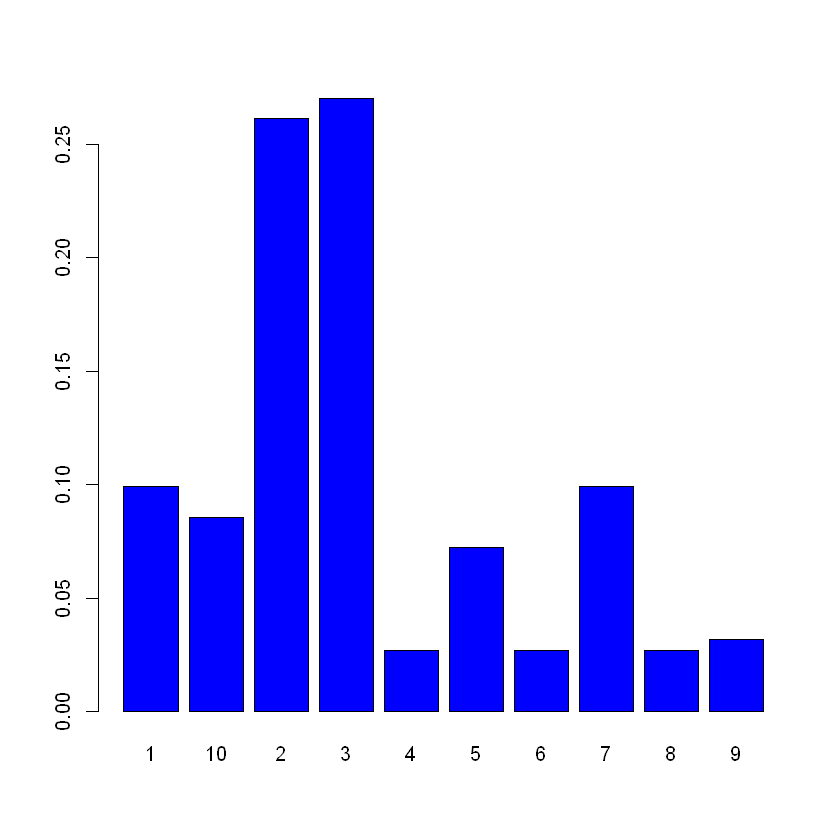

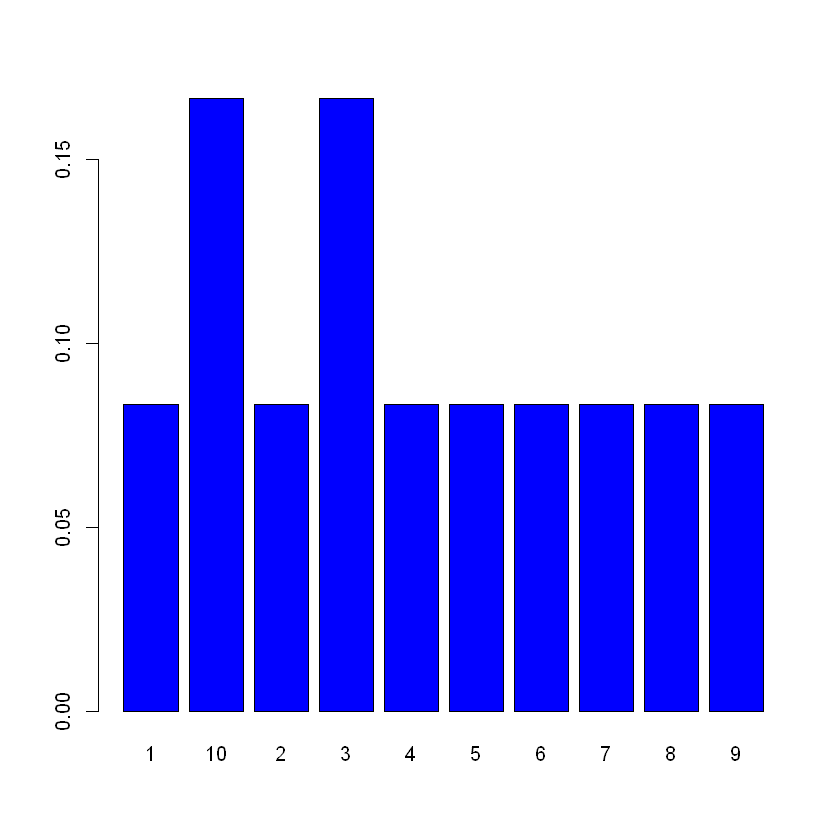

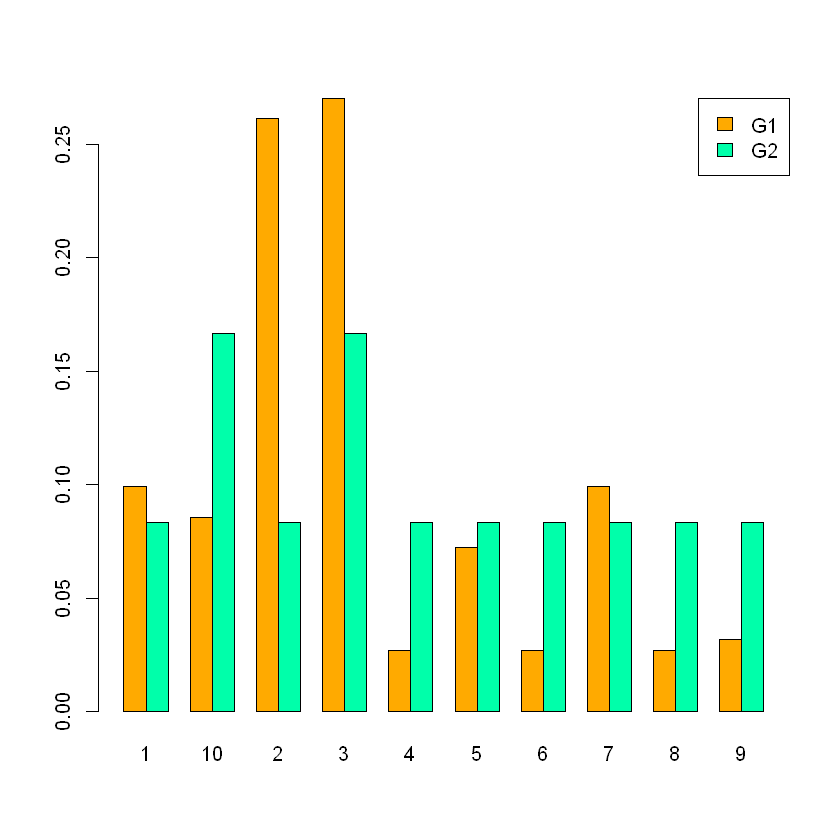

In [6]:
paths1 = lcy.graph.allShortestPath(g1)
paths2 = lcy.graph.allShortestPath(g2)
contribution1 = lcy.pathway.geneContribution(paths1, plot = T)
contribution2 = lcy.pathway.geneContribution(paths2, plot = T)
barplot(rbind(contribution1, contribution2),beside = T, col = c("#FFAA00FF","#00FFAAFF"))
legend("topright", fill = c("#FFAA00FF","#00FFAAFF"), legend = c("G1","G2"))

### 3. Scoring pathway alteration using PerPAS on synthetic data

Warning message in data("PerPAS"):
"data set 'PerPAS' not found"Warning message in data("PerPAS"):
"data set 'PerPAS' not found"Warning message in data("PerPAS"):
"data set 'PerPAS' not found"Warning message in data("PerPAS"):
"data set 'PerPAS' not found"Warning message in data("PerPAS"):
"data set 'PerPAS' not found"Warning message in data("PerPAS"):
"data set 'PerPAS' not found"Warning message in data("PerPAS"):
"data set 'PerPAS' not found"Warning message in data("PerPAS"):
"data set 'PerPAS' not found"Warning message in data("PerPAS"):
"data set 'PerPAS' not found"Warning message in data("PerPAS"):
"data set 'PerPAS' not found"Warning message in data("PerPAS"):
"data set 'PerPAS' not found"Warning message in data("PerPAS"):
"data set 'PerPAS' not found"Warning message in data("PerPAS"):
"data set 'PerPAS' not found"Warning message in data("PerPAS"):
"data set 'PerPAS' not found"Warning message in data("PerPAS"):
"data set 'PerPAS' not found"Warning message in data("PerPAS"):
"data

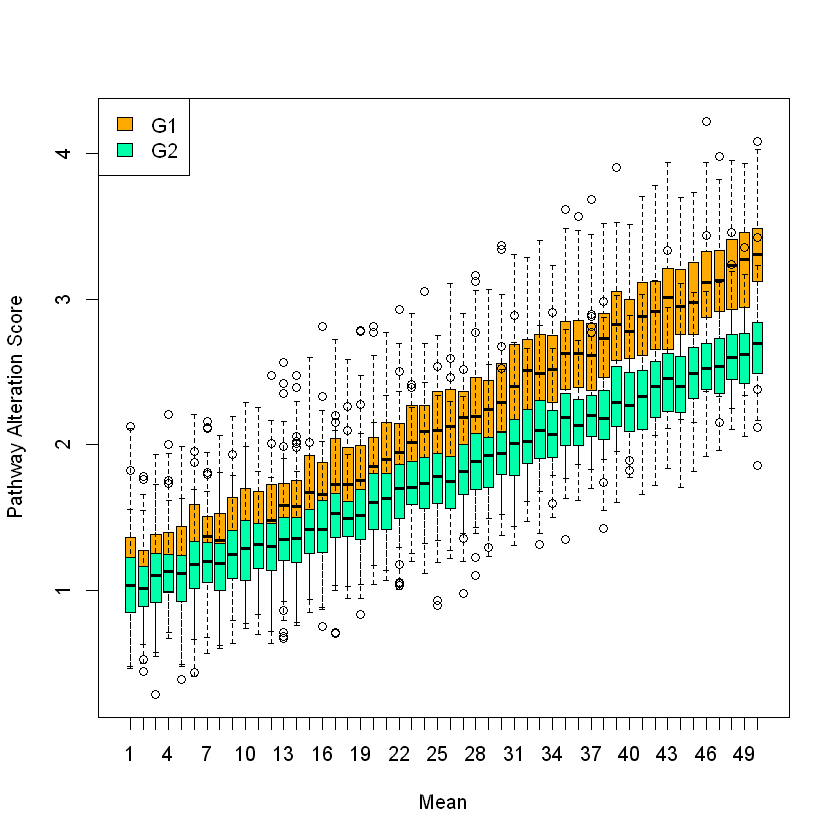

In [7]:
#  Fixed standard deviation (σ=0.1), and various means 
y1  <- lapply(1:length(z.mean), function(x){
    y  <- lcy.pathway.scoring(g = g1, data = z.mean[[x]], 
                              score.type = "APD", use = "neighbor")})

y1  <- do.call(cbind, y1)
y2  <- lapply(1:length(z.mean), function(x){
    y  <- lcy.pathway.scoring(g = g2, data = z.mean[[x]], 
                              score.type = "APD", use = "neighbor")})
y2  <- do.call(cbind, y2)
# 
boxplot(y1, col = "#FFAA00FF", ylab = "Pathway Alteration Score", xlab = "Mean")
boxplot(y2, add = TRUE, col = "#00FFAAFF")
legend("topleft", fill = c("#FFAA00FF","#00FFAAFF"), legend = c("G1", "G2"))

Warning message in data("PerPAS"):
"data set 'PerPAS' not found"Warning message in data("PerPAS"):
"data set 'PerPAS' not found"Warning message in data("PerPAS"):
"data set 'PerPAS' not found"Warning message in data("PerPAS"):
"data set 'PerPAS' not found"Warning message in data("PerPAS"):
"data set 'PerPAS' not found"Warning message in data("PerPAS"):
"data set 'PerPAS' not found"Warning message in data("PerPAS"):
"data set 'PerPAS' not found"Warning message in data("PerPAS"):
"data set 'PerPAS' not found"Warning message in data("PerPAS"):
"data set 'PerPAS' not found"Warning message in data("PerPAS"):
"data set 'PerPAS' not found"Warning message in data("PerPAS"):
"data set 'PerPAS' not found"Warning message in data("PerPAS"):
"data set 'PerPAS' not found"Warning message in data("PerPAS"):
"data set 'PerPAS' not found"Warning message in data("PerPAS"):
"data set 'PerPAS' not found"Warning message in data("PerPAS"):
"data set 'PerPAS' not found"Warning message in data("PerPAS"):
"data

"data set 'PerPAS' not found"Warning message in data("PerPAS"):
"data set 'PerPAS' not found"Warning message in data("PerPAS"):
"data set 'PerPAS' not found"Warning message in data("PerPAS"):
"data set 'PerPAS' not found"Warning message in data("PerPAS"):
"data set 'PerPAS' not found"Warning message in data("PerPAS"):
"data set 'PerPAS' not found"Warning message in data("PerPAS"):
"data set 'PerPAS' not found"Warning message in data("PerPAS"):
"data set 'PerPAS' not found"Warning message in data("PerPAS"):
"data set 'PerPAS' not found"Warning message in data("PerPAS"):
"data set 'PerPAS' not found"Warning message in data("PerPAS"):
"data set 'PerPAS' not found"Warning message in data("PerPAS"):
"data set 'PerPAS' not found"Warning message in data("PerPAS"):
"data set 'PerPAS' not found"Warning message in data("PerPAS"):
"data set 'PerPAS' not found"Warning message in data("PerPAS"):
"data set 'PerPAS' not found"Warning message in data("PerPAS"):
"data set 'PerPAS' not found"Warning mes

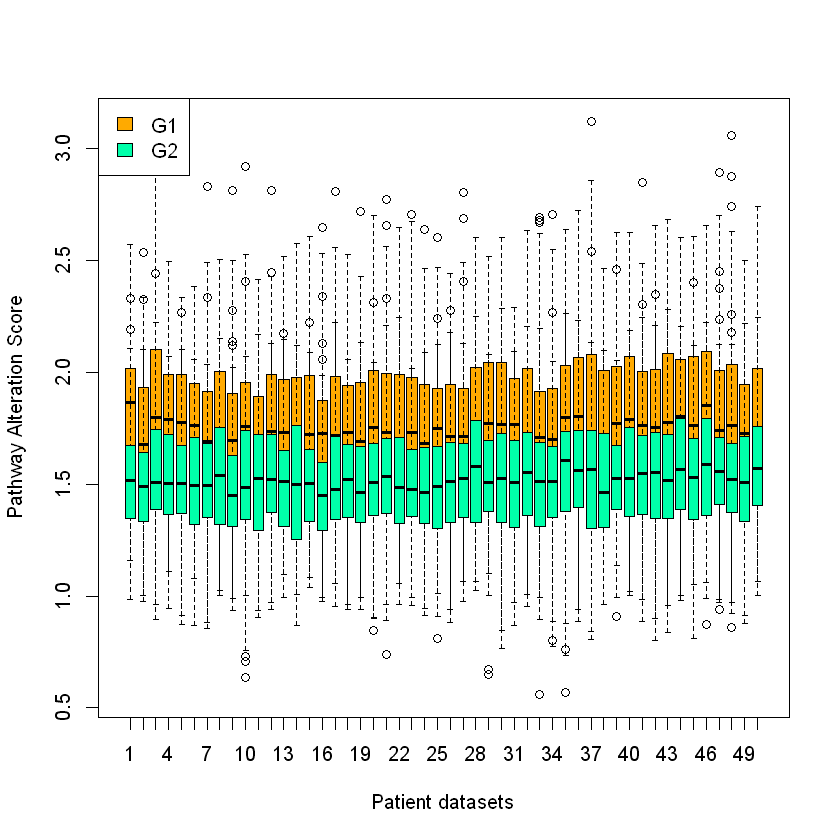

In [9]:
#  Fixed mean (μ=2), and various standard deviations 
s1  <- lapply(1:length(z.sd), function(x){ 
    y  <- lcy.pathway.scoring(g = g1, data = z.sd[[x]], 
                              score.type = "APD", use = "neighbor")})
s1  <- do.call(cbind, s1)
s2  <- lapply(1:length(z.sd), function(x){
    y <- lcy.pathway.scoring(g = g2, data = z.sd[[x]], 
                             score.type = "APD", use = "neighbor")})
s2  <- do.call(cbind, s2)

# Figure 
boxplot(s1[,1:50], col = "#FFAA00FF", ylab = "Pathway Alteration Score", xlab = "Patient datasets")
boxplot(s2[,1:50], add = TRUE, col = "#00FFAAFF")
legend("topleft", fill = c("#FFAA00FF", "#00FFAAFF"), legend = c("G1", "G2"))

### 4. Scoring pathway alteration using PerPAS on breast cancer data

Warning message in data("PerPAS"):
"data set 'PerPAS' not found"Loading required package: survival
Warning message in lcy.survival.estimate(clinic = clinic[group$treat, ], group = as.numeric(index), :
"NAs introduced by coercion"

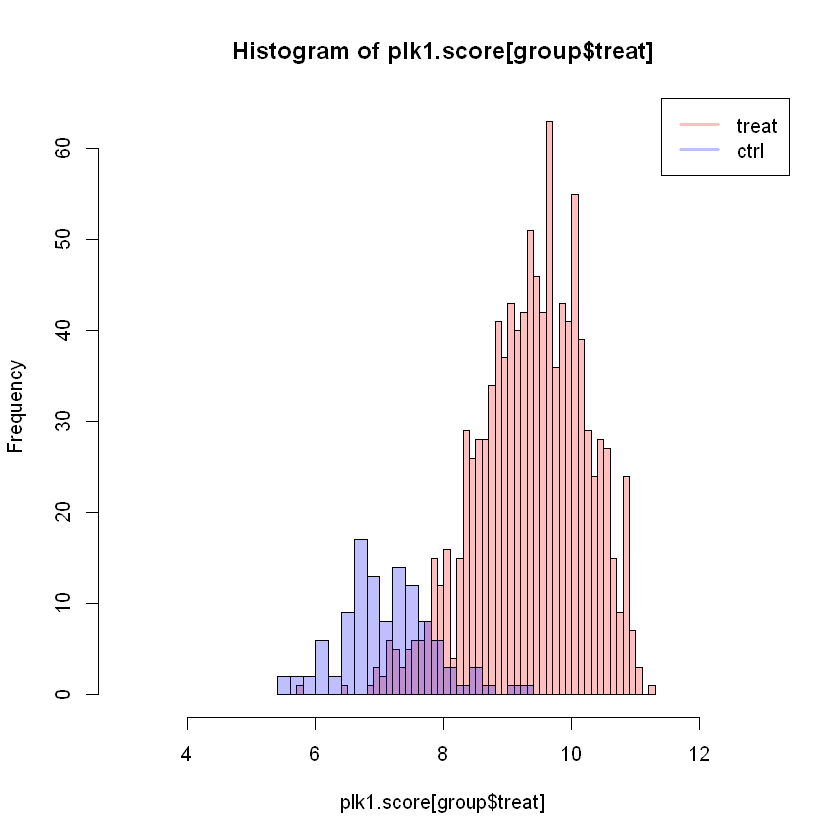

[1] 0.008584407

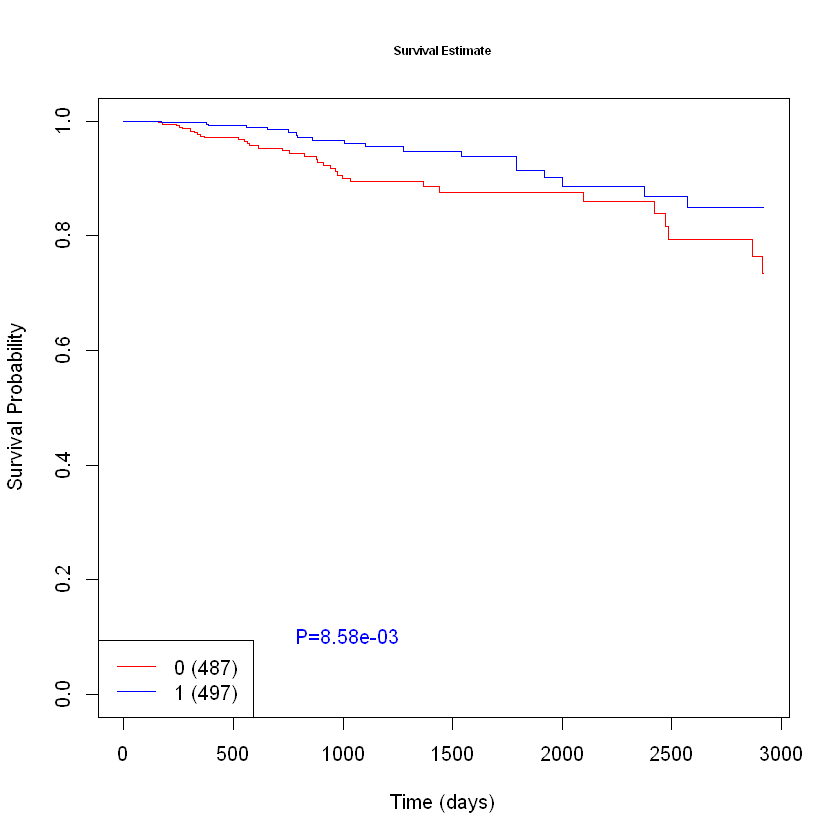

In [10]:
# standardization
norm.data <- lcy.tORz.score(data = data, group = group, byrow = T, scale = TRUE, method = "median", type = "zscore")

# scoring alteration
plk1.score <- lcy.pathway.scoring(path = plk1.all.pathway, data = data, score.type = "PDT")

# plot distribution 
h1 <- hist(plk1.score[group$treat], plot = FALSE, breaks = 50)
h2 <- hist(plk1.score[group$ctrl], plot = FALSE, breaks = 20)
plot(h1, col = rgb(1,0,0,1/4), xlim = c(3,13))  # sec
plot(h2, col = rgb(0,0,1,1/4), xlim = c(3,13), add = T)  # first histogram

legend("topright", legend = names(group), col = c(rgb(1,0,0,1/4), rgb(0,0,1,1/4)), lty = 1, lwd=3)
index <- plk1.score[group$treat] < median(plk1.score[group$treat])

#survival estimate 
lcy.survival.estimate(clinic = clinic[group$treat,], group = as.numeric(index), col.time = 1, 
                      col.event = 2, label.event = "Alive", time.out.limit = 8*365)